# Подключение необходимых модулей

In [2]:
import pandas as pd   
import seaborn as sns    
import matplotlib.pyplot as plt

# Загрузка набора данных

In [3]:
df = pd.read_csv("/Users/evgenijmihajlov/Downloads/replacements_rows.csv")

# Обзор данных

In [4]:
df.head(5)

id    group   lesson_old    teacher_old lesson_new        teacher_new  \
0  2042  24ВЕБ-2  Информатика  Уразаева А.А.     Физика       Кашапов В.В.   
1  2043    24Л-1          NaN            NaN     Физ-ра     Гильманов Р.А.   
2  2044    24Л-1          NaN            NaN    История  Крыжановский Ф.А.   
3  2045    24Л-2       Физика   Кашапов В.В.    История  Крыжановский Ф.А.   
4  2046  24ОИБ-1       Физика   Кашапов В.В.        Нет                NaN   

  cabinet  number        date  is_full_day_replacements  
0     334       1  2025-03-26                     False  
1     с/з       1  2025-03-26                      True  
2      13       2  2025-03-26                      True  
3      13       1  2025-03-26                     False  
4     NaN       2  2025-03-26                     False

1. **ID**: Уникальный идентификатор для каждой записи
2. **Name**: Имя спортсмена или участника
3. **Sex**: Пол участника
4. **Age**: Возраст участника
5. **Height**: Рост участника в сантиметрах
6. **Weight**: Вес участника в килограммах 
7. **Team**: Название команды, в которой выступает участник.
8. **NOC**: Код страны участника
9. **Games**: Название Олимпийских игр
10. **Year**: Год проведения Олимпийских игр 
11. **Season**: Сезон игр
12. **City**: Город, в котором проводились Олимпийские игры
13. **Sport**: Вид спорта, в котором участвовал спортсмен
14. **Event**: дисциплина в рамках вида спорта
15. **Medal**: Тип медали, если участник получил награду ("Gold", "Silver", "Bronze" или пропуск).

In [163]:
df.shape

(271116, 15)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Размерность набора данных: 271116 наблюдений и 15 признаков.
В наборе данных присутствуют пропущенные значения.

In [165]:
# Проверка на пропущенные записи
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Пустые значения обнаружены в следующих признаках: **Height**, **Weight**, **Age**, **Medal**.

In [166]:
df.describe()

ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

Аномальные значения находятс в признаках Age, где максимальный возраст участника 97 лет, а так минимальный возраст равен 10, так же аномальное значение присутствует в признаки Weight -  максимальное значение 214 и минимальное 25, и в признаки Height присутствует аномальное значение 226 см и минимальное 127.

In [167]:
df.describe(include=['object']).T

count  unique                      top    freq
Name    271116  134732     Robert Tait McKenzie      58
Sex     271116       2                        M  196594
Team    271116    1184            United States   17847
NOC     271116     230                      USA   18853
Games   271116      51              2000 Summer   13821
Season  271116       2                   Summer  222552
City    271116      42                   London   22426
Sport   271116      66                Athletics   38624
Event   271116     765  Football Men's Football    5733
Medal    39783       3                     Gold   13372

In [168]:
# Подсчет количество дубликатов
df.duplicated().sum()

1385

В наборе данных присутствует 1385 дубликатов.

# Предобработка данных

In [169]:
# Заменяем аномальные значения на возраста
df['Age'] = df['Age'].where(df['Age'] <= 40, 40)
df['Age'] = df['Age'].where(df['Age'] >= 16, 16)
# Заменяем аномальные значения на роста
df['Height'] = df['Height'].where(df['Height'] <= 210, 210)
df['Height'] = df['Height'].where(df['Height'] >= 140, 140)
# Заменяем аномальные значения на веса
df['Weight'] = df['Weight'].where(df['Weight'] <= 80, 80)
df['Weight'] = df['Weight'].where(df['Weight'] >= 40, 40)

In [170]:
df.describe()

ID            Age         Height         Weight  \
count  271116.000000  271116.000000  271116.000000  271116.000000   
mean    68248.954396      25.856501     183.030459      71.040946   
std     39022.286345       6.056507      17.121541      10.201607   
min         1.000000      16.000000     140.000000      40.000000   
25%     34643.000000      22.000000     170.000000      63.000000   
50%     68205.000000      25.000000     180.000000      75.000000   
75%    102097.250000      29.000000     194.000000      80.000000   
max    135571.000000      40.000000     210.000000      80.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

Можем увидеть что теперь значения в норме.

In [171]:
# Замена пустых значений на популярные
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['Height'] = df['Height'].fillna(df['Height'].mode()[0])
df['Weight'] = df['Weight'].fillna(df['Weight'].mode()[0])
df['Medal'] = df['Medal'].fillna("Нет")


In [172]:
# Проверка на пропущенные записи
df.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

Все пустые значения в наборе данных были заполнены

In [173]:
df['Medal'].value_counts()

Medal
Нет       231333
Gold       13372
Bronze     13295
Silver     13116
Name: count, dtype: int64

In [174]:
# Удаляем дубликаты в наборе данных
df = df.drop_duplicates()


In [175]:
# Снова проверяем количество дубликатов в наборе данных
df.duplicated().sum()

0

In [176]:
# Преобразование возраста в целочисленный тип данных
df['Age'] = df['Age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     269731 non-null  int64  
 4   Height  269731 non-null  float64
 5   Weight  269731 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   269731 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 32.9+ MB


# Разведочный анализ данных

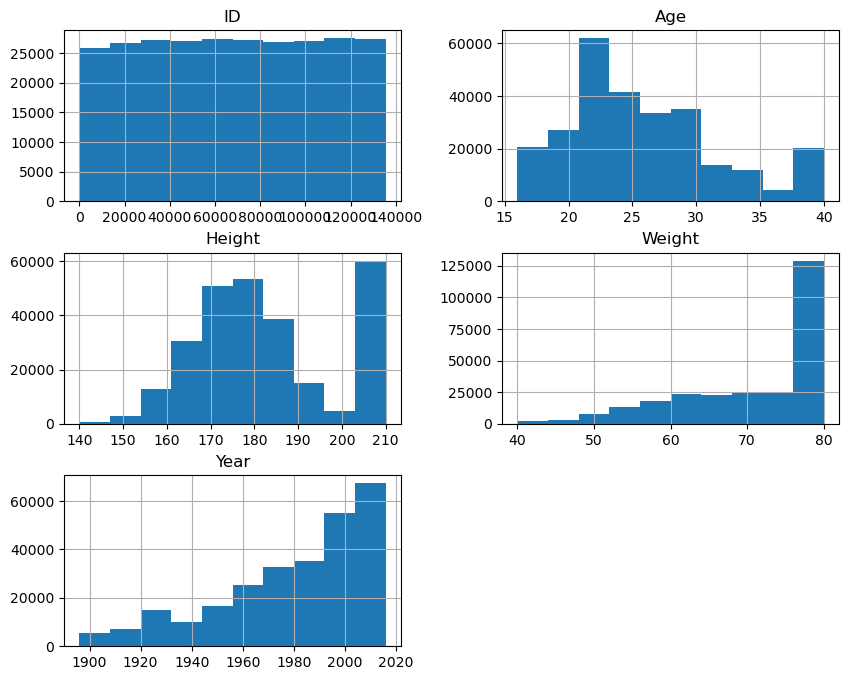

In [177]:
df.hist(figsize=(10,8), bins=10);

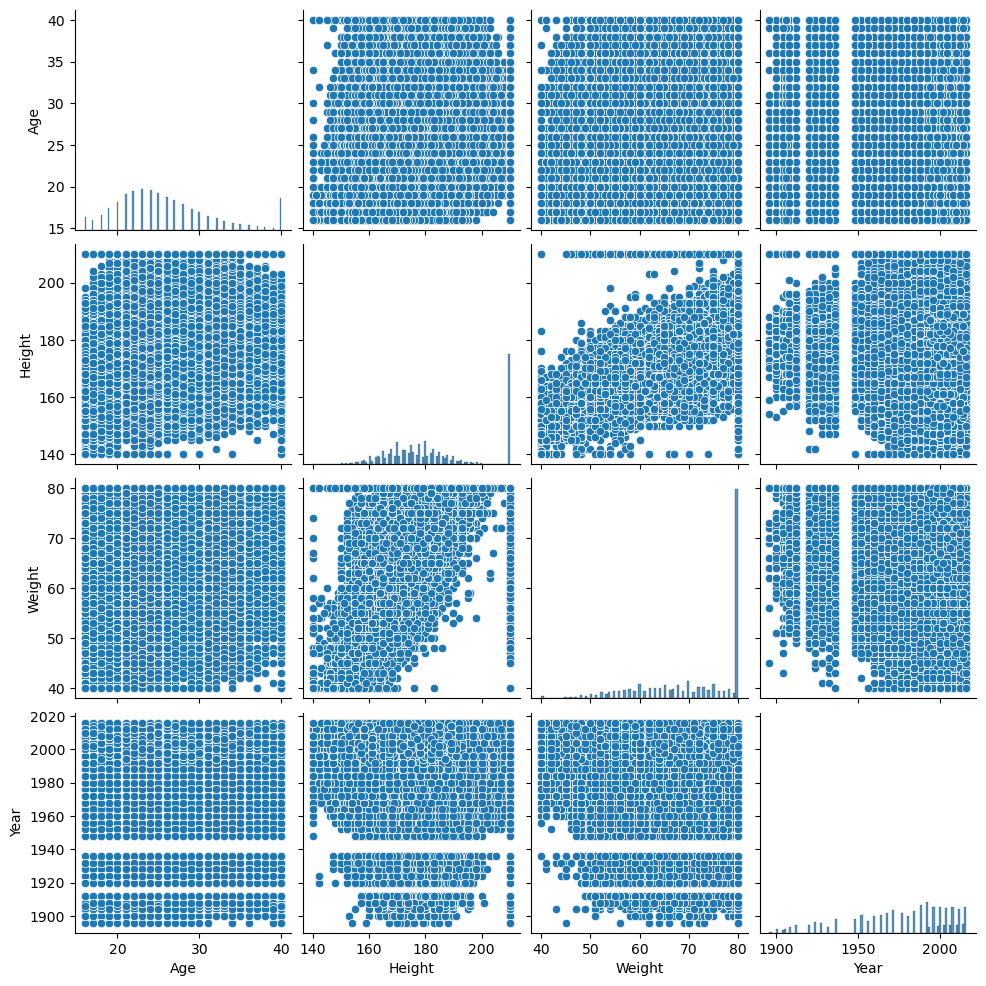

In [178]:
sns.pairplot(data=df[["Age", "Height", "Weight", "Year"]])

In [179]:
df[["Age", "Height", "Weight", "Year"]].corr()

Age    Height    Weight      Year
Age     1.000000  0.249107  0.253110 -0.195330
Height  0.249107  1.000000  0.762918 -0.527934
Weight  0.253110  0.762918  1.000000 -0.327758
Year   -0.195330 -0.527934 -0.327758  1.000000

Можем наблюдать зависимость между признаком **Height** и признаком **Weight**

<Axes: >

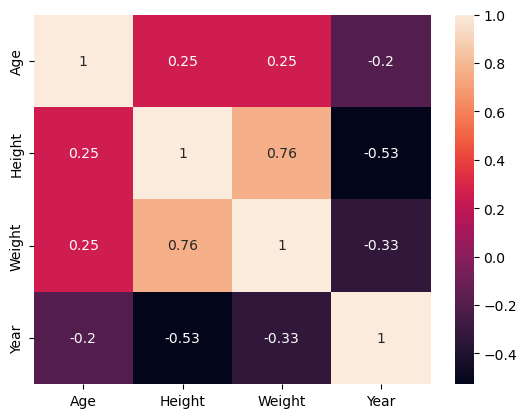

In [180]:
sns.heatmap(df[["Age", "Height", "Weight", "Year"]].corr(), annot=True)

/var/folders/pz/9q8_5h3j00qdqlglt1r7j8q80000gn/T/ipykernel_35486/2886268034.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_medal_counts.values, y=country_medal_counts.index, palette="rocket_r")


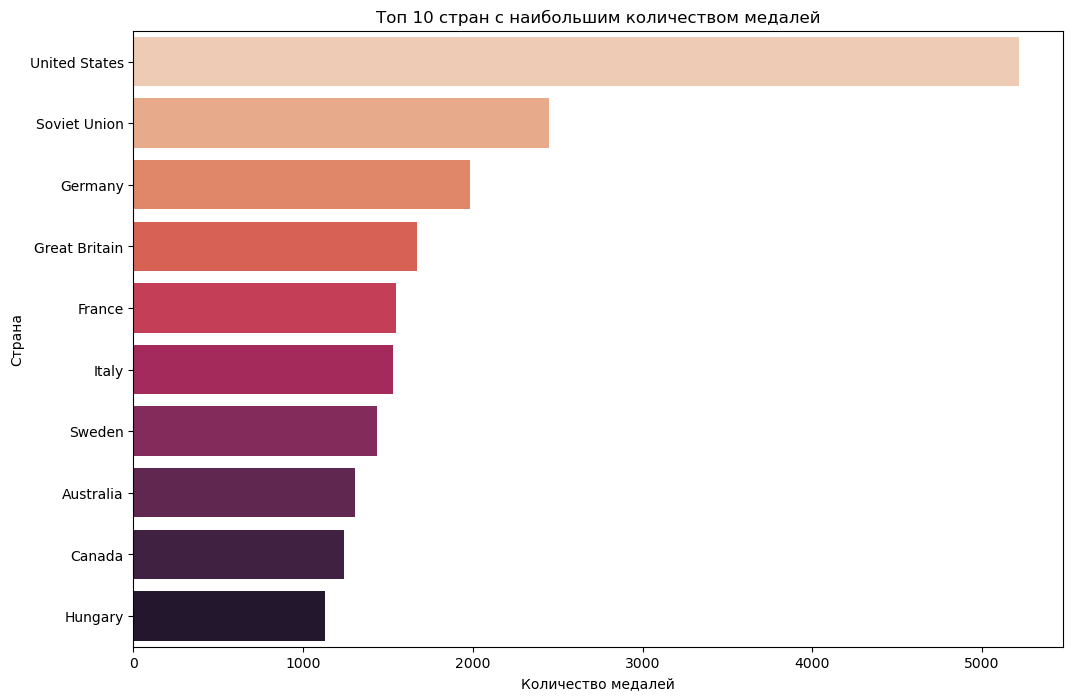

In [181]:
medal_data = df[df['Medal'] != "Нет"]
country_medal_counts = medal_data['Team'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=country_medal_counts.values, y=country_medal_counts.index, palette="rocket_r")
plt.title("Топ 10 стран с наибольшим количеством медалей")
plt.xlabel("Количество медалей")
plt.ylabel("Страна")
plt.show()

# Вывод
1. Был загружен набор данных. Первые наблюдения показали, что в наборе данных есть пропуски и аномальное значение Height, Weight, Age.
2. Проведена предобработка данных. Обработали пропущенные значения и аномальные значения.
3. Проведен разведочный анализ данных. Наблюдается небольшая зависимость между признаками Height и Weight.